In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("iplauction2023.csv")
df.head()

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,NaN,NaN,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,NaN,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   309 non-null    object 
 1   player style           309 non-null    object 
 2   nationality            309 non-null    object 
 3   base price (in lacs)   151 non-null    float64
 4   final price (in lacs)  238 non-null    float64
 5   franchise              238 non-null    object 
 6   status                 309 non-null    object 
dtypes: float64(2), object(5)
memory usage: 17.0+ KB


In [4]:
df.isnull().sum()

name                       0
player style               0
nationality                0
base price (in lacs)     158
final price (in lacs)     71
franchise                 71
status                     0
dtype: int64

In [5]:
df.fillna(0, inplace= True)

In [6]:
df.head()

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,0.0,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,0.0,0,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,0.0,0,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD


In [7]:
df.describe()

,base price (in lacs),final price (in lacs)
count,309.000000,309.000000
mean,28.932039,283.495146
std,51.125246,423.355778
min,0.000000,0.000000
25%,0.000000,20.000000
50%,0.000000,50.000000
75%,20.000000,400.000000
max,200.000000,1850.000000


In [8]:
df.duplicated().sum()

0

In [9]:
df["name"].duplicated().sum()

0

In [10]:
df.head()

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,0.0,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,0.0,0,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,0.0,0,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD


In [11]:
df["name"].count()

309

In [27]:
max_value_row = df[df['final price (in lacs)'] == df['final price (in lacs)'].max()]
max_value_row

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
150,Sam Curran,Allrounder,England,200.0,1850.0,PBKS,SOLD


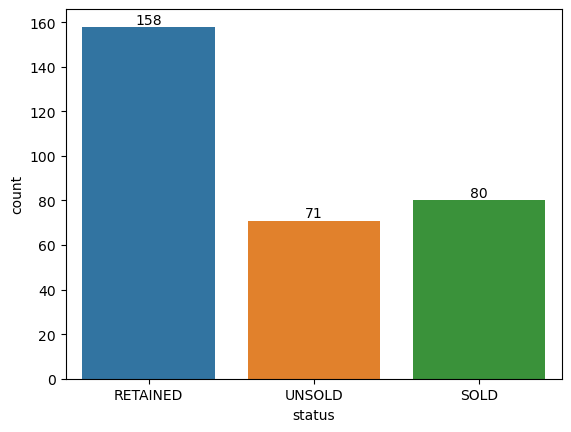

In [12]:
ax = sns.countplot(x = 'status' , data = df )
ax.bar_label(ax.containers[0])
plt.show()

# OUT OF 309 PLAYERS 158 WERE RETAINED , 71 WERE UNSOLD AND 80 WERE SOLD AND SAM CURRAN WAS THE MOST EXPENSIVE PLAYER OF THE AUCTION

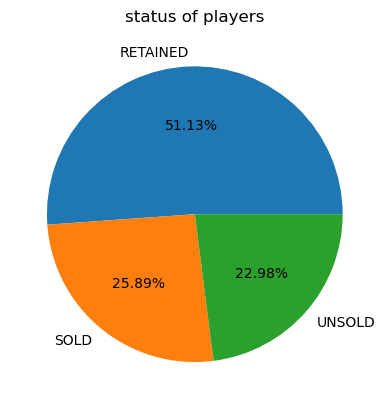

In [13]:
gb = df.groupby("status").agg({'status':'count'})
plt.pie(gb['status'],labels = gb.index , autopct = "%1.2f%%")
plt.title("status of players")
plt.show()

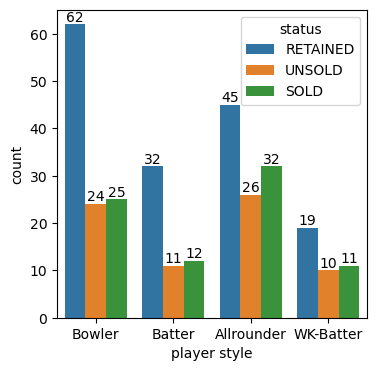

In [14]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = 'player style' , data= df , hue = 'status')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.show()


# Teams seem to value Bowlers and Allrounders more for retention but also a significant number got unsold, while Batters and WK-Batters had lower retention and sales.

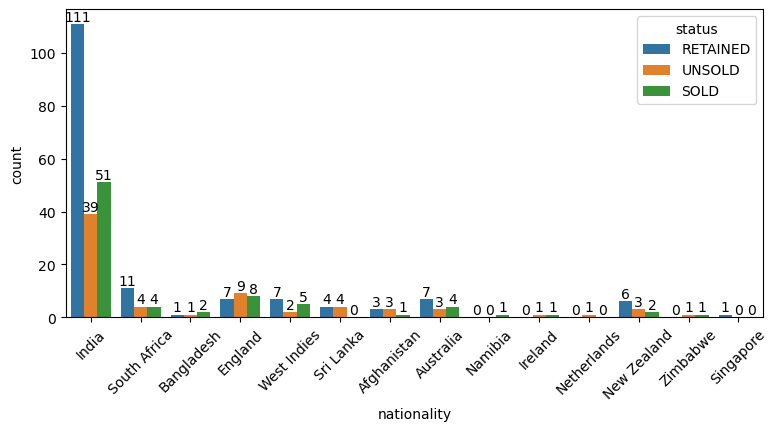

In [16]:
plt.figure(figsize = (9,4))
ax = sns.countplot(x = 'nationality' , data= df , hue = 'status')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.xticks(rotation= 45)
plt.show()

# APART FROM INDIA TEAMS MOSTLY PREFERRED ENGLAND AND SOUTH AFRICAN PLAYERS 

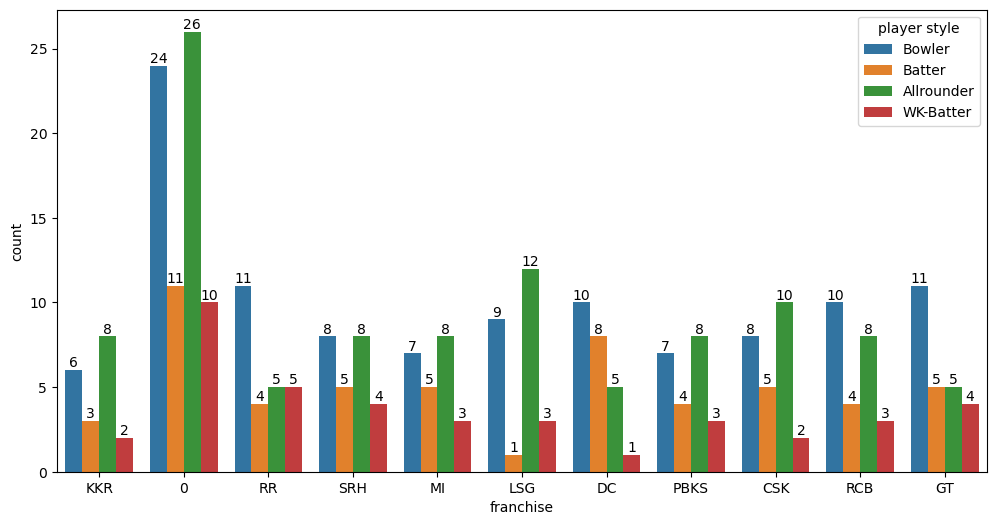

In [18]:
plt.figure(figsize = (12,6))
ax = sns.countplot(x = 'franchise' , data= df , hue = 'player style')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
plt.show()


# LSG HAD MOST NUMBERS OF ALLROUNDERS IN  THEIR SQUAD
# GT AND RR HAD MOST NUMBERS OF BOWLERS IN THEIR SQUAD
# DC HAD MOST NUMBERS OF BATTER IN THEIR SQUAD
# RR HAD MOST NUMBERS OF WK-BATTER IN THEIR SQUAD

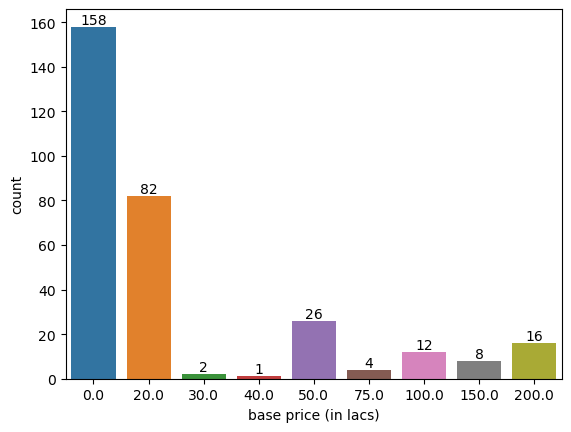

In [20]:
ax = sns.countplot(x = 'base price (in lacs)' , data = df  )
ax.bar_label(ax.containers[0])
plt.show()

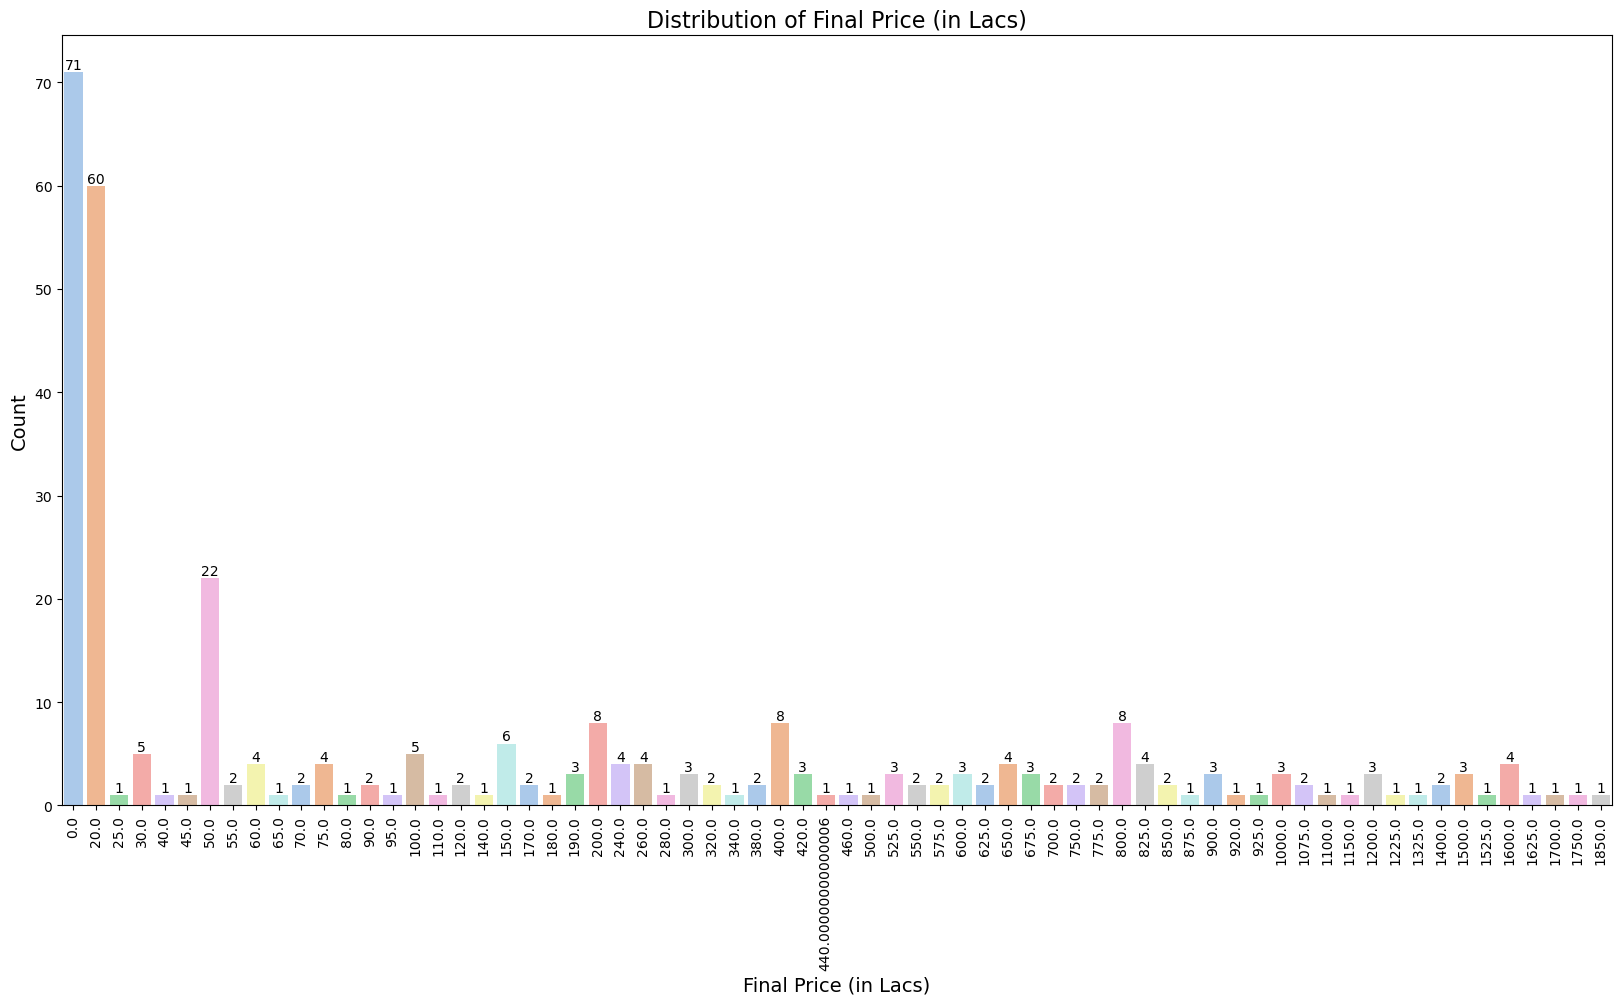

In [21]:

plt.figure(figsize=(20, 10))
ax = sns.countplot(x='final price (in lacs)', data=df, width=0.8, palette='pastel')
ax.bar_label(ax.containers[0], fontsize=10)
plt.xticks(rotation=90, ha='center', fontsize=10)
plt.xlabel('Final Price (in Lacs)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Final Price (in Lacs)', fontsize=16)
plt.show()


# MOST OF THE PLAYERS WERE BOUGHT ON THEIR BASE PRICE 20 AND 50 LACS AND 18.50 CRORE WAS THE HIGHEST PRICE OF THIS SEASON AUCTION

In [40]:
df_csk = df[df['franchise']=='CSK']
df_csk

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
29,Bhagath Varma,Allrounder,India,20.0,20.0,CSK,SOLD
39,Ajay Jadav Mandal,Allrounder,India,20.0,20.0,CSK,SOLD
80,Kyle Jamieson,Allrounder,New Zealand,100.0,100.0,CSK,SOLD
116,Nishant Sindhu,Allrounder,India,20.0,60.0,CSK,SOLD
124,Shaik Rasheed,Batter,India,20.0,20.0,CSK,SOLD
130,Ajinkya Rahane,Batter,India,50.0,50.0,CSK,SOLD
147,Ben Stokes,Allrounder,England,200.0,1625.0,CSK,SOLD
153,Matheesha Pathirana,Bowler,Sri Lanka,0.0,20.0,CSK,RETAINED
166,Mukesh Choudhary,Bowler,India,0.0,20.0,CSK,RETAINED
173,Subhranshu Senapati,Batter,India,0.0,20.0,CSK,RETAINED


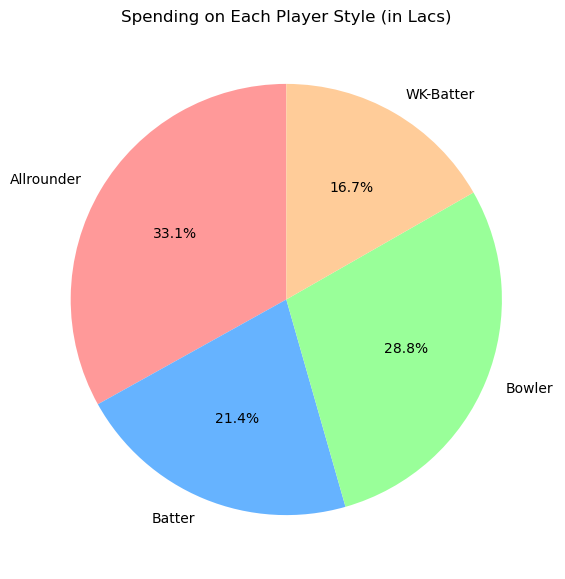

In [41]:
spend_by_style = df.groupby('player style')['final price (in lacs)'].sum().dropna()
plt.figure(figsize=(10, 7))
plt.pie(spend_by_style, labels=spend_by_style.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Spending on Each Player Style (in Lacs)')
plt.show()


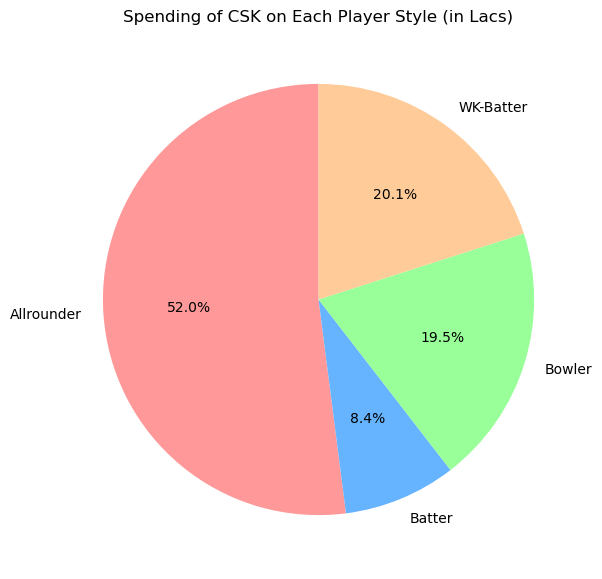

In [43]:
spend_by_style = df_csk.groupby('player style')['final price (in lacs)'].sum().dropna()
plt.figure(figsize=(10, 7))
plt.pie(spend_by_style, labels=spend_by_style.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Spending of CSK on Each Player Style (in Lacs)')
plt.show()


# CSK SPENT MOST OF  THEIR MONEY ON ALL ROUNDERS 

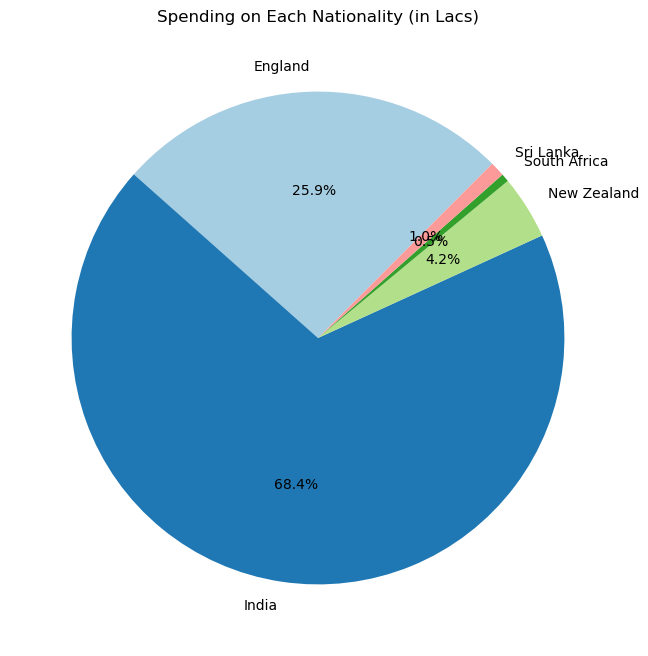

In [44]:
spend_by_nationality = df_csk.groupby('nationality')['final price (in lacs)'].sum().dropna()
plt.figure(figsize=(12, 8))
plt.pie(spend_by_nationality, labels=spend_by_nationality.index, autopct='%1.1f%%', startangle=45, 
        colors=plt.cm.Paired(range(len(spend_by_nationality))))
plt.title('Spending on Each Nationality (in Lacs)')
plt.show()


# APART FROM INDIA CSK SPENT THEIR MOST AMOUNT OF MONEY ON ENGLAND PLAYERS 

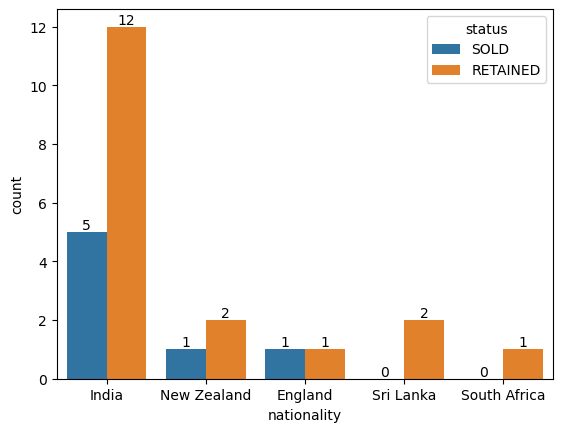

In [47]:
ax = sns.countplot(x = 'nationality' , data = df_csk , hue='status' )
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

# ALL FOREIGN PLAYERS WERE MOSTLY RETAINED BY CSK 

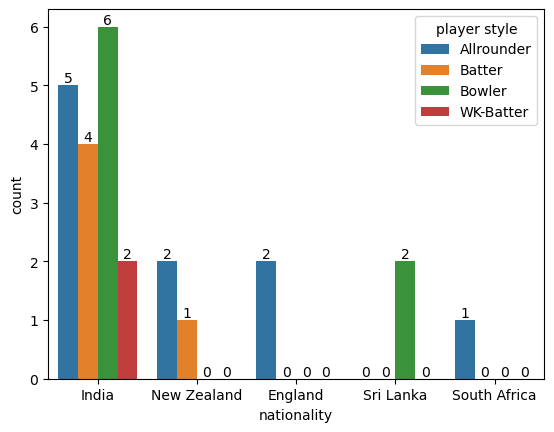

In [48]:
ax = sns.countplot(x = 'nationality' , data = df_csk , hue='player style' )
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
plt.show()

# MOST OF THE FOREIGN PLAYERS IN CSK'S SQUAD WERE ALL ROUNDERS